# LAB | BMI Survey 


## Part 1: Descriptive Analysis

## Problem Description

Overweight and obesity, measured by Body Mass Index (BMI), are increasing health concerns in Denmark and globally. This project analyzes BMI data from a Danish survey to provide an overview of BMI distributions and investigate potential factors influencing BMI, such as gender, age, and fast food consumption. The analysis aims to summarize and visualize the data using descriptive statistics and graphical methods.

---

## Instructions

- Complete each section below using Python and appropriate libraries (e.g., pandas, numpy, matplotlib, seaborn).
- Provide code, tables, and figures as needed.
- Write brief explanations for your findings after each analysis step.
- Do **not** include code in your final report; code should be submitted separately as an appendix.
- Ensure all figures and tables are clearly labeled and referenced in your explanations.

---

## Q1. Data Overview

**a) Short Description of the Data**

- List all variables in the dataset.
- Classify each variable as quantitative or categorical.
- State the number of observations.
- Check for missing values.


**Instructions:**  
- Summarize the dataset variables and their types.
- Report the number of observations and any missing values.

---

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bmi1_data.csv", sep=";", quotechar='"')
df.head()

,height,weight,gender,urbanity,fastfood
0,180,80,1,5,24.0
1,185,98,1,1,6.0
2,180,80,1,5,6.0
3,168,60,0,4,24.0
4,173,83,1,5,24.0


height → quantitative (measured in cm).

weight → quantitative (kg).

gender → categorical (0/1 usually, representing male/female or similar).

urbanity → categorical (looks like 0/1; rural vs urban).

fastfood → quantitative (looks like number of fast food meals per month).

In [3]:
## TODO
df.describe()
# data is mostly clear and makes sense, but fastfood has a big range between mean and median. 
# This is likely due to outliers—a few individuals who eat fast food very frequently.
# We can check this with a boxplot.


,height,weight,gender,urbanity,fastfood
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,173.903448,76.737931,0.503448,3.668966,21.037241
std,9.328365,15.208286,0.501721,1.374647,40.321484
min,154.000000,50.000000,0.000000,1.000000,0.000000
25%,166.000000,65.000000,0.000000,3.000000,6.000000
50%,173.000000,75.000000,1.000000,4.000000,6.000000
75%,182.000000,87.000000,1.000000,5.000000,24.000000
max,196.000000,130.000000,1.000000,5.000000,365.000000


In [4]:
df.isnull().sum()  # no missing values
len(df)  # 145 rows

145

## 2. Calculating BMI

- Compute BMI for each respondent using the formula:

  $$\text{BMI} = \frac{\text{weight (kg)}}{\left[\text{height (m)}\right]^2}$$

- Add BMI as a new column to the dataset.

---


In [5]:
## TODO
bmi = df["weight"] / (df["height"]/100)**2
df["bmi"] = bmi
df.head()

,height,weight,gender,urbanity,fastfood,bmi
0,180,80,1,5,24.0,24.691358
1,185,98,1,1,6.0,28.634039
2,180,80,1,5,6.0,24.691358
3,168,60,0,4,24.0,21.258503
4,173,83,1,5,24.0,27.732300



## 3. Empirical Distribution of BMI

**b) Density Histogram of BMI Scores**

- Plot a density histogram of BMI.
- Describe the distribution: symmetry, skewness, possible negative values, and variation.

**Instructions:**  
- Comment on the shape and spread of the BMI distribution.

---


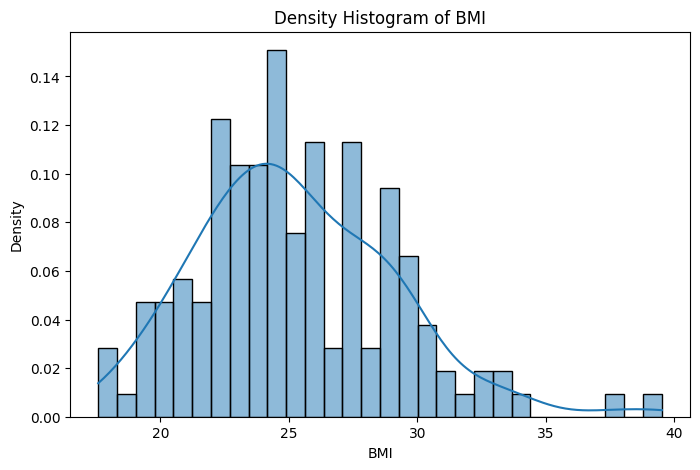

In [6]:
## TODO
plt.figure(figsize=(8,5))
sns.histplot(df["bmi"], kde=True, stat="density", bins=30)

plt.xlabel("BMI")
plt.ylabel("Density")
plt.title("Density Histogram of BMI")
plt.show()

- The shape is roughly unimodal. Most values are clsutered between 30 and 30.
- The distribution is slightly right-skewed: there’s a longer tail extending into higher BMI values (30+).
- No negative or impossible values are present.
- There’s some spread: while most people fall in the normal-to-overweight range, a few outliers push toward 35–40.


## 4. Gender Subsets

**c) Separate Density Histograms for Women and Men**

- Create subsets for women and men.
- Plot density histograms for each group.
- Compare and describe the distributions.


**Instructions:**  
- Discuss any gender differences in the BMI distributions.

---


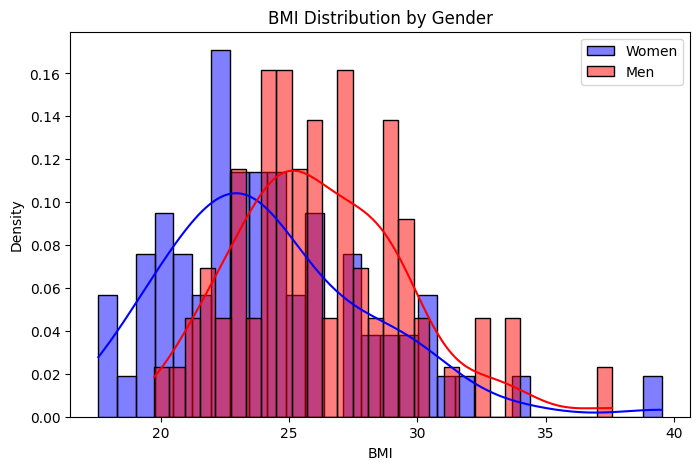

In [7]:
## TODO
plt.figure(figsize=(8,5))

sns.histplot(df[df["gender"] == 0]["bmi"], 
             kde=True, stat="density", bins=30, 
             color="blue", alpha=0.5, label="Women")

sns.histplot(df[df["gender"] == 1]["bmi"], 
             kde=True, stat="density", bins=30, 
             color="red", alpha=0.5, label="Men")

plt.xlabel("BMI")
plt.ylabel("Density")
plt.title("BMI Distribution by Gender")
plt.legend()
plt.show()


- Both shapes are unimodal, centered around different values. 
- As expected, women have lowever avarege BMIs than men.


## 5. Boxplot by Gender

**d) Box Plot of BMI by Gender**

- Create a box plot of BMI scores grouped by gender.
- Describe the distribution, symmetry/skewness, differences, and outliers.

**Instructions:**  
- Interpret the box plot and compare distributions.

---


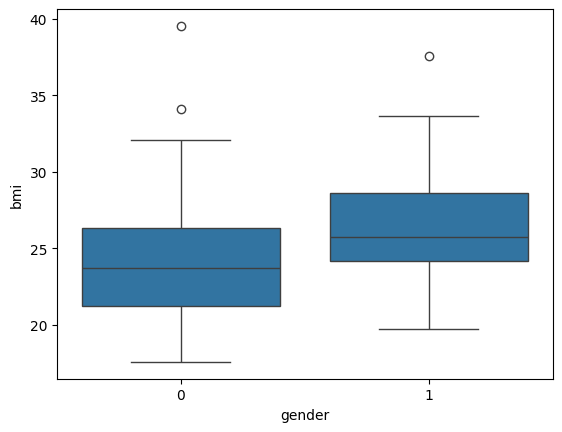

In [8]:
## TODO
sns.boxplot(data=df, x="gender", y="bmi")
plt.show()

- Center (Median): Men (1) have a higher median BMI (~26) compared to women (0) (~24).

- Spread (IQR): Both groups have similar interquartile ranges (the middle 50% of values), roughly spanning ~22–27 for women and ~24–28 for men.

- Skewness: Both distributions are slightly right-skewed, with whiskers extending further toward higher BMI values.

- Outliers: Each gender shows a few high-BMI outliers (above 35, approaching 40), indicating individuals well outside the typical range.

- Comparison: Men generally have higher BMI than women, but the overall variation is comparable between the two groups.

## 6. Summary Statistics

**e) Key Summary Statistics for BMI**

- Calculate and report the following for everyone, women, and men:
  - Number of observations (n)
  - Sample mean (\(\bar{x}\))
  - Sample variance (\(s^2\))
  - Sample standard deviation (\(s\))
  - Lower quartile (Q1)
  - Median (Q2)
  - Upper quartile (Q3)

**Instructions:**  
- Present the summary statistics in a table.
- Discuss what additional insights are provided by the table compared to the box plot.

---


In [13]:
def summary_stats(x):
    return pd.Series({
        "n": x.count(),
        "mean_bmi": x.mean(),
        "variance": x.var(),
        "std_dev": x.std(),
        "Q1": x.quantile(0.25),
        "median (Q2)": x.median(),
        "Q3": x.quantile(0.75),
    })

by_gender = (
    df.groupby("gender")["bmi"]
      .apply(summary_stats)
      .unstack(level=0)                 # <-- make gender the columns
      .rename(columns={0: "Women", 1: "Men"})
)

by_gender["Overall"] = summary_stats(df["bmi"])
by_gender = by_gender[["Women", "Men", "Overall"]].round(2)
by_gender


gender,Women,Men,Overall
n,72.00,73.00,145.00
mean_bmi,24.22,26.27,25.25
variance,16.42,11.07,14.69
std_dev,4.05,3.33,3.83
Q1,21.26,24.15,22.59
median (Q2),23.69,25.73,24.69
Q3,26.29,28.63,27.64


Interpretation:
The summary table confirms the visual insights from the boxplots. Men have a higher mean and median BMI than women. Women’s BMI shows slightly higher variability (larger variance and std dev). Both groups cover similar ranges, but men’s quartiles are shifted upward. Compared to the boxplot, the table provides exact numerical values, which make differences between groups more precise and easier to report.

## Part 2: Missing Values, Outliers, and Bivariate EDA

## 1. Missing Values

- List the number of missing values for each variable in the dataset.
- Choose and apply appropriate strategies for handling missing values (e.g., removal, imputation).
- Justify your chosen approach.
- Show the number of observations before and after handling missing values.

In [15]:
## TODO
df.isna().sum()  # no missing values

height      0
weight      0
gender      0
urbanity    0
fastfood    0
bmi         0
dtype: int64

## 2. Outlier Detection and Handling

### a) Identifying Outliers

- Use visual (boxplots, scatterplots) and statistical methods (e.g., IQR rule, z-scores) to detect outliers in BMI, height, and weight.
- List any extreme values found and discuss whether they are plausible or likely errors.



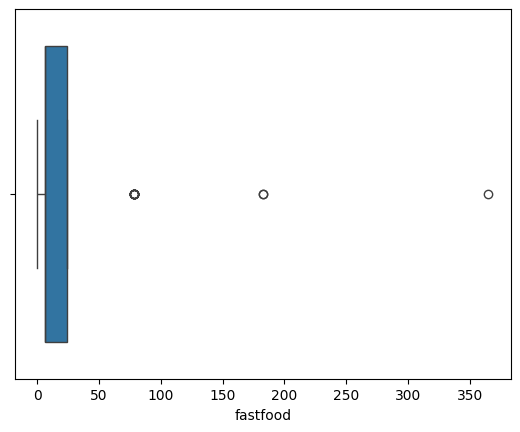

In [ ]:
## TODO
### Insert your Answer Here ###

sns.boxplot(data=df, x="fastfood")
plt.show()

- As expected, the boxplot shows that some individuals eat fast food every single day, while others eat fast food almost every day. Both are extreme, but not impossible.

In [ ]:
# confirm which rows these belong to by filtering.
df[df["fastfood"] > 50] 

,height,weight,gender,urbanity,fastfood,bmi
26,185,82,1,5,78.2,23.959094
38,172,65,1,4,78.2,21.971336
48,183,109,1,3,365.0,32.548001
50,182,79,1,5,78.2,23.849777
63,187,78,1,5,78.2,22.305471
73,186,130,1,4,78.2,37.576598
101,169,55,0,3,78.2,19.257029
103,176,65,1,5,78.2,20.983988
105,195,95,1,4,78.2,24.983563
120,182,82,1,5,78.2,24.755464


- One male eats fast food every day. he has a BMI of 32 (considered obese), and weighs 109kg. 

In [38]:
from scipy import stats
import numpy as np

# compute z-scores
df["fastfood_z"] = stats.zscore(df["fastfood"], nan_policy='omit')

# flag outliers (|z| > 3 is a common rule of thumb)
fastfood_outliers = df[np.abs(df["fastfood_z"]) > 3]

fastfood_outliers[["fastfood", "fastfood_z"]]


,fastfood,fastfood_z
48,365.0,8.560077
124,182.5,4.018265
141,182.5,4.018265


- A z-score of 8.56 means that 365 is 8.5 standard deviations above the mean.
- These are strong statistical outliers.

- They could be real (somebody eating fast food daily or more), but more likely they’re data entry errors (maybe “365” meant “36.5” or “182.5” meant “18.25”).

- Compared to the bulk of the data (clustered around 0–30), these points distort the scale and would definitely need attention before analysis.

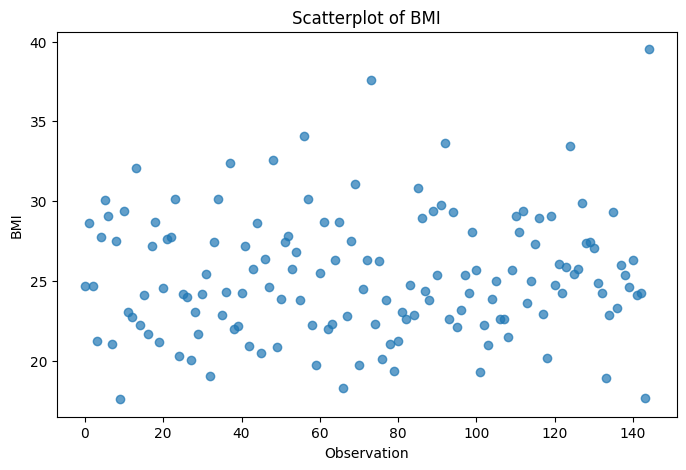

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(df.index, df["bmi"], alpha=0.7)
plt.xlabel("Observation")
plt.ylabel("BMI")
plt.title("Scatterplot of BMI")
plt.show()



In [36]:
df[df["bmi"] > 35] 

,height,weight,gender,urbanity,fastfood,bmi
73,186,130,1,4,78.2,37.576598
144,163,105,0,3,0.0,39.519741


- IQR:

In [37]:
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["bmi"] < lower_bound) | (df["bmi"] > upper_bound)]
outliers


,height,weight,gender,urbanity,fastfood,bmi
73,186,130,1,4,78.2,37.576598
144,163,105,0,3,0.0,39.519741


- BMI of 37 - 40 is high but plausible.

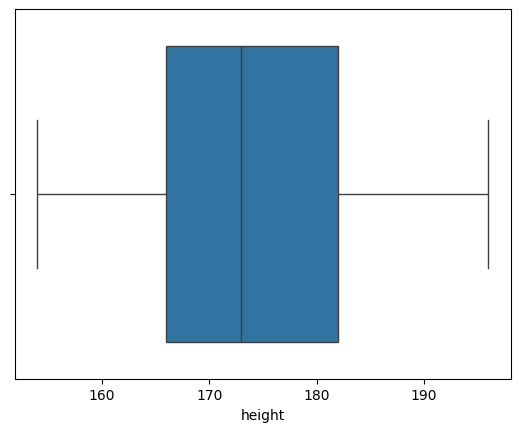

In [35]:
sns.boxplot(data=df, x="height")
plt.show()

- No outliers


### b) Handling Outliers

- Decide how to handle detected outliers (e.g., keep, remove, or correct).
- Justify your approach and show the effect on the dataset.



### My answer: Keep

Justification: They might represent real extreme cases (somebody eating fast food daily).

Effect: Skews the distribution, mean goes way up, variance inflates. Median is less affected.

## 3. Bivariate Exploratory Data Analysis (EDA)

### a) BMI and Fast Food Consumption

- Create a scatter plot of BMI vs. fast food consumption.
- Calculate and interpret the correlation coefficient.
- Comment on any patterns or associations observed.

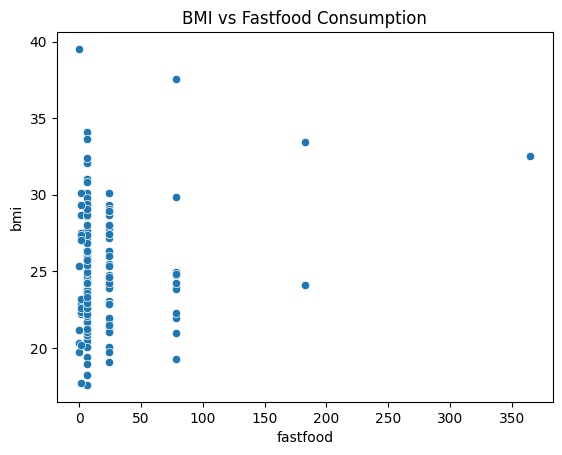

In [40]:
sns.scatterplot(data=df, x="fastfood", y="bmi")
plt.title("BMI vs Fastfood Consumption")
plt.show()


In [ ]:
corr = df["bmi"].corr(df["fastfood"])
print(f"Pearson’s r (linear correlation) is {corr}")

Pearson’s r (linear correlation) is 0.15315776740366066


With outliers included, r ≈ 0.15.
- That’s a very weak positive correlation:
- Suggests a slight tendency that higher fastfood consumption is linked to higher BMI.
- But the relationship is so weak it’s not practically meaningful.

In [46]:
# remove extreme fastfood outliers
df_no_outliers = df[df["fastfood"] <= 50]   # cutoff at 50 meals/month

# recompute correlation
corr_no_outliers = df_no_outliers["bmi"].corr(df_no_outliers["fastfood"])

print(f"r = {corr_no_outliers}")


r = -0.022666350451369374


The correlation between fastfood consumption and BMI is distorted by extreme outliers. Including all data, Pearson’s r was 0.15, suggesting a weak positive relationship. After removing implausible values (e.g., 182.5 and 365 meals/month), the correlation dropped to –0.02, indicating no meaningful linear relationship between fastfood consumption and BMI. This suggests that the extreme outliers were driving the initial correlation.

### b) BMI by Gender

- Use boxplots or violin plots to compare BMI distributions between genders.
- Test for significant differences (e.g., t-test or Mann-Whitney U test).

In [ ]:
## TODO
### Insert your Answer Here ###

### c) BMI by Urbanity

- Visualize BMI across different urbanity categories using boxplots or bar plots.
- Discuss any differences or trends.

In [ ]:
## TODO
### Insert your Answer Here ###

### d) Additional Bivariate Relationships

- Explore other pairs of variables as relevant (e.g., weight vs. height, fast food vs. gender).
- Use appropriate plots and statistics.

In [ ]:
## TODO
### Insert your Answer Here ###

## 4. Summary

- Summarize the key findings from your missing value analysis, outlier handling, and bivariate EDA.
- Discuss how these steps improve the quality and reliability of your subsequent analyses.

In [ ]:
## TODO
### Insert your Answer Here ###

Happy Coding .... ;) 